### Fetching MNIST Dataset 

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,Y=mnist["data"],mnist["target"]

### There are 70,000 images, and each image has 784 features. we will reshape every image it to a 28×28 array, and display it using Matplotlib’s imshow() function


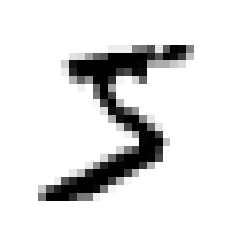

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()


### since labels are string we will cast them to integers

In [5]:
type(Y[0])

str

In [6]:
import numpy as np
Y=Y.astype(np.uint8)

### Split our data into train and test data

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]


### We will simplify the problem to a binary classification Task. a binary classifier, capable of distinguishing between just two classes, 5 and not-5.


In [8]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)


### let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier . This classifier has the advantage of being capable of handling very large datasets efficiently.



In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

### Since only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. This demonstrates why accuracy is generally not the preferred performance measure here especially in skewed datasets.



### A much better way to evaluate our performance is using Confusion Matrix, precision and recall

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [12]:
>>> from sklearn.metrics import confusion_matrix
>>> confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score, recall_score
print( precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred) )

0.8370879772350012
0.6511713705958311


## Precision and Recall Tradeoff

#### the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.





In [15]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

### plot precision and recall as functions of the threshold value


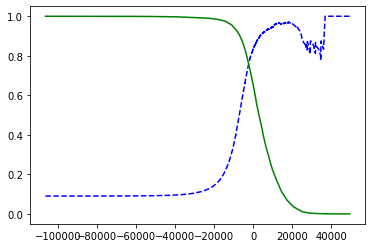

In [16]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


###  let’s suppose we aim for 90% precision. We look up the first plot and find that we need to use a threshold of about 8,000 . we will search for the lowest threshold that gives us at least 90% precision


In [23]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

y_train_pred_90 = (y_scores >= threshold_90_precision)

In [24]:
precision_score(y_train_5, y_train_pred_90)


0.9000345901072293

In [25]:
recall_score(y_train_5, y_train_pred_90)


0.4799852425751706